# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [53]:
#seu código aqui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [54]:
df_base = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=";")
df_base.head(5)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [55]:
y = df_base['Valor_Aluguel']
X = df_base[['Metragem']]




# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [56]:
#seu código aqui

poly_features = PolynomialFeatures(degree=2)

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [57]:
#seu código aqui
x_poly = poly_features.fit_transform(X)
x_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]], shape=(7203, 3))

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [58]:
#seu código aqui
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=1, test_size=0.2)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


d:\Helton\Programacao_EBAC\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


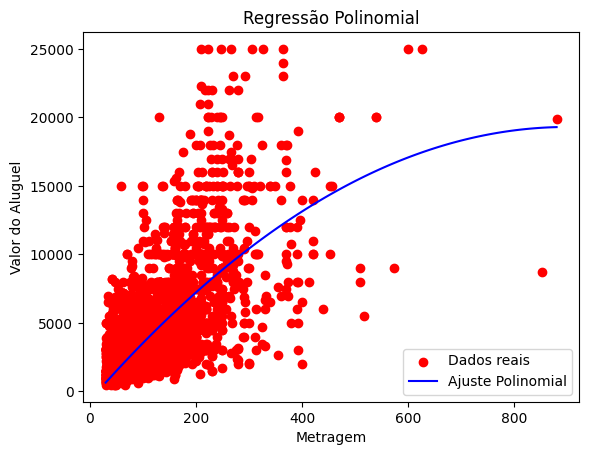

In [60]:
y_pred = model.predict(X_test)

# CriarEmos uma sequência de valores X para a visualização, buscando a suavização
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [61]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.5300


# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [62]:
#seu código aqui
poly_features = PolynomialFeatures(degree=4)

x_poly = poly_features.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=1, test_size=0.2)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


d:\Helton\Programacao_EBAC\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


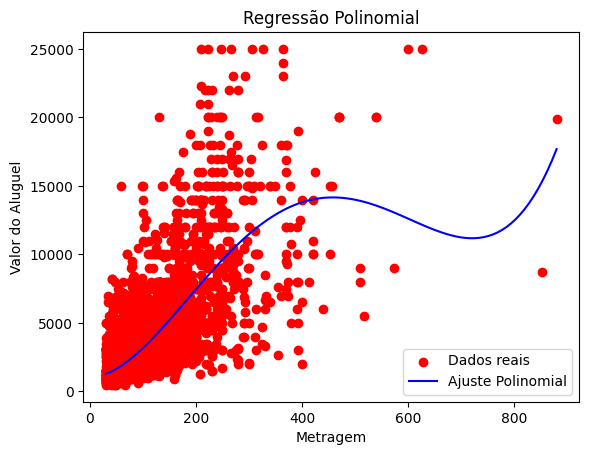

In [65]:
y_pred = model.predict(X_test)

# CriarEmos uma sequência de valores X para a visualização, buscando a suavização
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [66]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.5463


O modelo com o"degree=" maior, obteve uma leve melhora, seu R² anterior era de (0.5300) e melhorou para (0.5463)

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Ridge encolhe os coeficientes.

Lasso zera alguns coeficientes.

Elastic Net combina os dois e pega o melhor de cada um - Fazendo a seleção de variáveis como o Lasso; Mantém estabilidade com variáveis correlacionadas como o Ridge;
Funciona melhor quando há muitas features correlacionadas (onde o Lasso falha)